# Dataset Summary and Exploration

In [1]:
import os
import json
import pandas as pd
import numpy as np
import cv2

import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# Read image data from csv file 
folder = './data/data/'
csv_path = 'driving_log.csv'

training_data = pd.read_csv(folder + csv_path, skipinitialspace=True)

print('First 10 entries from driving_log.csv:')
print(training_data.head(10))

First 10 entries from driving_log.csv:
                                   center  \
0  IMG/center_2016_12_01_13_30_48_287.jpg   
1  IMG/center_2016_12_01_13_30_48_404.jpg   
2  IMG/center_2016_12_01_13_31_12_937.jpg   
3  IMG/center_2016_12_01_13_31_13_037.jpg   
4  IMG/center_2016_12_01_13_31_13_177.jpg   
5  IMG/center_2016_12_01_13_31_13_279.jpg   
6  IMG/center_2016_12_01_13_31_13_381.jpg   
7  IMG/center_2016_12_01_13_31_13_482.jpg   
8  IMG/center_2016_12_01_13_31_13_584.jpg   
9  IMG/center_2016_12_01_13_31_13_686.jpg   

                                   left  \
0  IMG/left_2016_12_01_13_30_48_287.jpg   
1  IMG/left_2016_12_01_13_30_48_404.jpg   
2  IMG/left_2016_12_01_13_31_12_937.jpg   
3  IMG/left_2016_12_01_13_31_13_037.jpg   
4  IMG/left_2016_12_01_13_31_13_177.jpg   
5  IMG/left_2016_12_01_13_31_13_279.jpg   
6  IMG/left_2016_12_01_13_31_13_381.jpg   
7  IMG/left_2016_12_01_13_31_13_482.jpg   
8  IMG/left_2016_12_01_13_31_13_584.jpg   
9  IMG/left_2016_12_01_13_31_13_686

In [3]:
print('Total number of images that each camera has:', len(training_data.index))
print('Total number of images:', 3 * len(training_data.index))
print('Total number of left turns:', len(training_data[(training_data['steering'] < 0)]))
print('Total number of right turns:', len(training_data[(training_data['steering'] > 0)]))
print('Number of images that have no turns', len(training_data[(training_data['steering'] == 0)]))

Total number of images that each camera has: 8036
Total number of images: 24108
Total number of left turns: 1775
Total number of right turns: 1900
Number of images that have no turns 4361


# Image Exploration

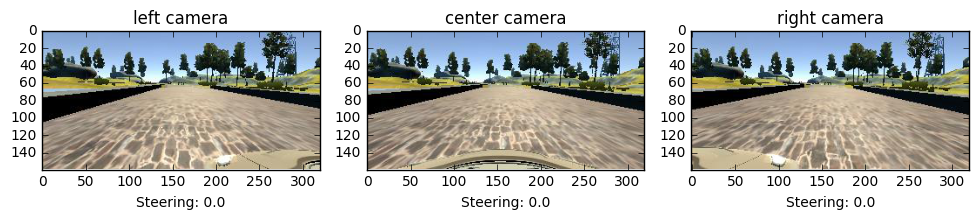

In [4]:
# Display Left, Center, and Right Camera images along with their steering angles 
headings = ['left', 'center', 'right']
fig = plt.figure(figsize=(10,10))
i = 0
for image in headings:
    image = mpimg.imread(folder + training_data[image].iloc[0])
    angle = training_data['steering'].iloc[0]
    
    ax = fig.add_subplot(1,3,i+1)
    fig.tight_layout()
    plt.title(headings[i] + ' camera')
    plt.xlabel("Steering: {}".format(angle))
    ax.imshow(image)
    i += 1  


# Preprocessing 

Original shape of left image: (160, 320, 3)
Shape of left image after cropping: (80, 320, 3)
shape of left image after resizing: (32, 64, 3)

Original shape of center image: (160, 320, 3)
Shape of center image after cropping: (80, 320, 3)
shape of center image after resizing: (32, 64, 3)

Original shape of right image: (160, 320, 3)
Shape of right image after cropping: (80, 320, 3)
shape of right image after resizing: (32, 64, 3)



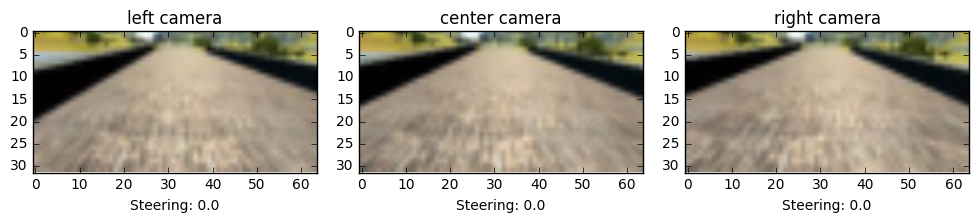

In [5]:
from scipy.misc import imresize

# Crop and resize left, center, and right camera images
# Display images with their corresponding steering angles
headings = ['left', 'center', 'right']
fig = plt.figure(figsize=(10,10))
i = 0
for image in headings:
    image = mpimg.imread(folder + training_data[image].iloc[0])
    print("Original shape of {}".format(headings[i]) + " image: {}".format(image.shape))
    
    image = image[55:135, :, :]
    print("Shape of {}".format(headings[i]) + " image after cropping: {}".format(image.shape))
    
    image_new = imresize(image,(32,64,3))
    print("shape of {}".format(headings[i]) + " image after resizing: {}".format(image_new.shape))

    print("")
    
    ax = fig.add_subplot(1,3,i+1)
    fig.tight_layout()
    plt.title(headings[i] + " camera")
    plt.xlabel("Steering: {}".format(angle))
    ax.imshow(image_new)    
    i += 1  

# Augmentation

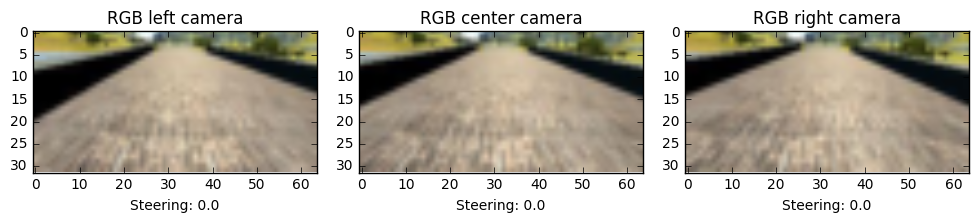

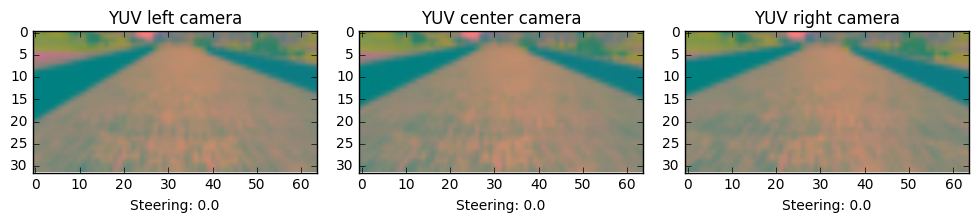

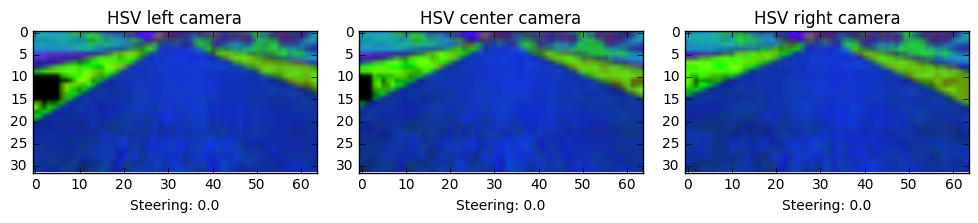

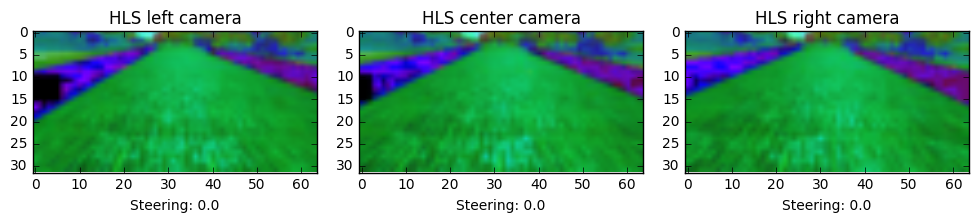

In [6]:
# Display Left, Center, and Right Camera images in RGB, YUV, HSV, and HLS color spaces 
color = ['RGB', 'YUV', 'HSV', 'HLS']
count = 0
for space in color:
    
    headings = ['left', 'center', 'right']
    fig = plt.figure(figsize=(10,10))
    i = 0
    for image in headings:
        image = mpimg.imread(folder + training_data[image].iloc[0])
        angle = training_data['steering'].iloc[0]
    
        if count == 1:
            image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        if count == 2:
            image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        if count == 3:
            image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    
        image = image[55:135, :, :]
    
        image_new = imresize(image,(32,64,3))
    
    
        ax = fig.add_subplot(1,3,i+1)
        fig.tight_layout()
        plt.title(color[count] + " "+ headings[i] + " camera")
        plt.xlabel("Steering: {}".format(angle))
        ax.imshow(image_new)
        i += 1
    count += 1

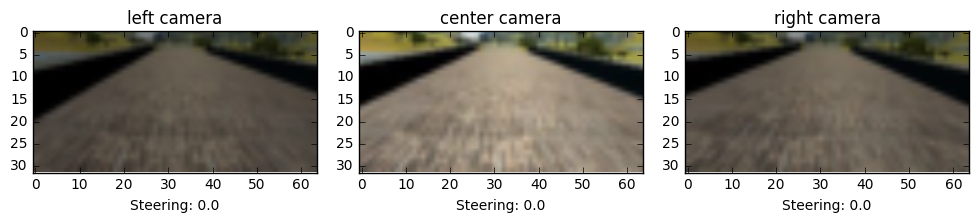

In [10]:
# Add random brightness to left, center, and right camera images
headings = ['left', 'center', 'right']
fig = plt.figure(figsize=(10,10))
i = 0
for image in headings:
    image = mpimg.imread(folder + training_data[image].iloc[0])
    angle = training_data['steering'].iloc[0]
    
    image_bright = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    image_bright[:, :, 2] = image_bright[:, :, 2] * (0.25 + np.random.uniform())
    image_bright = cv2.cvtColor(image_bright, cv2.COLOR_HSV2RGB)
    
    image = image_bright[55:135, :, :]
    
    image_new = imresize(image,(32,64,3))
    
    ax = fig.add_subplot(1,3,i+1)
    fig.tight_layout()
    plt.title(headings[i] + " camera")
    plt.xlabel("Steering: {}".format(angle))
    ax.imshow(image_new)    
    i += 1  

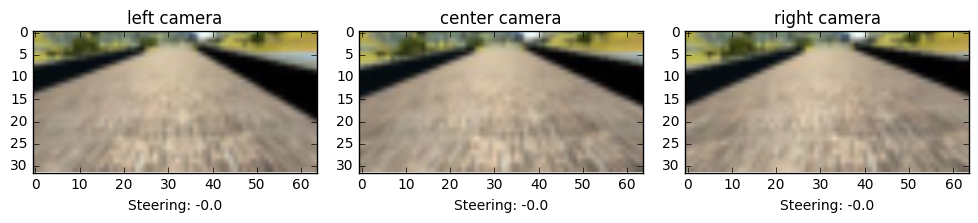

In [11]:
# Display flipped Left, Center, and Right Camera images
headings = ['left', 'center', 'right']
fig = plt.figure(figsize=(10,10))
i = 0
for image in headings:
    image = mpimg.imread(folder + training_data[image].iloc[0])
    angle = training_data['steering'].iloc[0]
    
    image = image[55:135, :, :]
    
    image_new = imresize(image,(32,64,3))
    
    image_flip = cv2.flip(image_new, 1)
    angle = angle * -1
    
    ax = fig.add_subplot(1,3,i+1)
    fig.tight_layout()
    plt.title(headings[i] + " camera")
    plt.xlabel("Steering: {}".format(angle))
    ax.imshow(image_flip)
    i += 1  

# Create Training Set 

In [12]:
# Left, center, and right column headings in csv file
headings = ['left', 'center', 'right']

# Create array to hold images and steering angles
images = []
angles = []

# Go through each image in the left, center, and right column headings in the csv file
for index in headings:
    for row in range(len(training_data.index)):
        
        # Read image 
        image = mpimg.imread(folder + training_data[index].iloc[row])
        
        # Get steering angle of current image
        angle = training_data['steering'].iloc[row]
        
        # Add offset to steering angle for left and right camera images
        if index == 'left':
            angle += 0.25
        if index == 'right':
            angle -= 0.25
        
        #print(image.shape)
        #print(training_data[index].iloc[row])
        #print(angle)
    
        # Crop image
        image_crop = image[55:135, :, :]
        #print(image.shape)
    
        # Resize image to 32x64x3
        image_resize = imresize(image_crop,(32,64,3))
        #print(image_new.shape)

        # Add random brightness to image
        image_bright = cv2.cvtColor(image_resize, cv2.COLOR_RGB2HSV)
        image_bright[:, :, 2] = image_bright[:, :, 2] * (0.25 + np.random.uniform())
        image_bright = cv2.cvtColor(image_bright, cv2.COLOR_HSV2RGB)
        
        # Append results to the 2 arrays that hold images and steering angles respectively
        images.append(image_bright)
        angles.append(angle)

In [13]:
#print(np.array(angles))
#print(len(angles))

# Create array to hold images that are flipped horizontally
flip_images = []


# Flip all images horizontally found in the images array and append them to flip_images array 
for i in range(len(images)):
    flip_images.append(np.fliplr(images[i]))
#np.array(flip_images).shape
#np.array(angles).shape

# Flip the corresponding steering angle of the image also by multiplying by -1
flip_angles = np.array(angles)*-1
#print(flip_angles)

# Add results to the 2 arrays that hold images and steering angles respectively
images.extend(flip_images)
angles.extend(flip_angles)
#print(angles)

# Create training set X_train and y_train from the images and angles arrays
X_train = np.array(images)
y_train = np.array(angles)

print(X_train.shape)
print(y_train.shape)


(48216, 32, 64, 3)
(48216,)


# Design and Test Model Architecture

In [14]:
# Normalize images using Min-Max scaling
def normalize(image_data):
    a = -0.5
    b = 0.5
    color_min = np.min(image_data)
    color_max = np.max(image_data)
    
    return a + (((image_data - color_min) * (b - a)) / (color_max - color_min))

X_train = normalize(X_train)

print('Images of training features are normalized.') 


Images of training features are normalized.


In [15]:
# Shuffle the data to change the order
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print('Training set is shuffled.')

Training set is shuffled.


In [16]:
# Split data into training and validation sets 
print('Number of training features to split: ', len(X_train))

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

print('Training and validation sets are split.') 
print('Number of training features: ', len(X_train))
print('Number of validation features ', len(X_validation))

Number of training features to split:  48216
Training and validation sets are split.
Number of training features:  43394
Number of validation features  4822


In [17]:
# Define model architecture
model = Sequential()

#model.add(BatchNormalization(axis=1, input_shape=(32,64,3)))
model.add(Convolution2D(24, 3, 3, subsample=(2,2), border_mode='valid', input_shape=(32,64,3)))
model.add(Activation('relu'))

model.add(Convolution2D(36, 3, 3, subsample=(2,2), border_mode='valid'))
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3, subsample=(2,2), border_mode='valid'))
model.add(Activation('relu'))

model.add(Convolution2D(64, 2, 2, subsample=(1,1), border_mode='valid'))
model.add(Activation('relu'))

model.add(Convolution2D(64, 2, 2, subsample=(1,1), border_mode='valid'))
model.add(Activation('relu'))


model.add(Flatten())

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(.5))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('relu'))

model.add(Dense(1))

model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 15, 31, 24)    672         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 15, 31, 24)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 7, 15, 36)     7812        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 7, 15, 36)     0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [18]:
# Compile model 
adam = Adam(lr=0.0001)
model.compile(loss='mse', optimizer=adam)

# Train model
model.fit(X_train, y_train, nb_epoch=20, batch_size=128, validation_data=(X_validation, y_validation))

# Save model to json file 
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# Save weights to HDF5 file
model.save_weights("model.h5")
print("Saved model to disk")

Train on 43394 samples, validate on 4822 samples
Epoch 1/20
43394/43394 [==============================] - 15s - loss: 0.0453 - val_loss: 0.0303